In [26]:
%matplotlib qt
from __future__ import print_function

from matplotlib.widgets import RectangleSelector
import numpy as np
import matplotlib.pyplot as plt


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    #print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    #print(" The button you used were: %s %s" % (eclick.button, erelease.button))
    img_plot.set_data(img_plot.get_array()*0)
    #plt.draw()
    
def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)




<IPython.core.display.Javascript object>


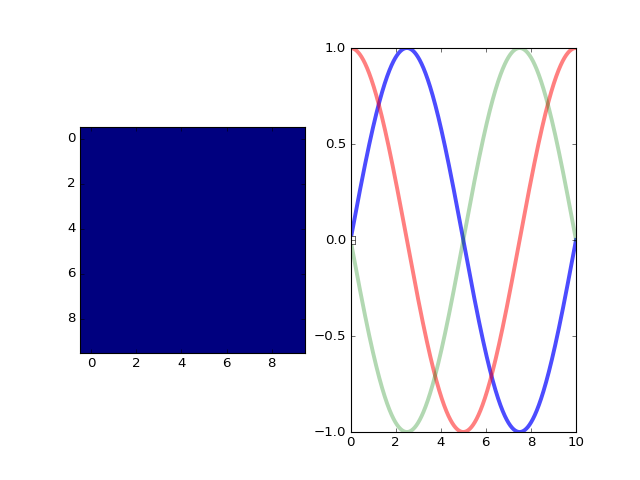


      click  -->  release


In [27]:
fig, ax = plt.subplots(1, 2)                    # make a new plotingrange
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

img_plot = ax[0].imshow(np.random.uniform(size=(10, 10)))

ax[1].plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
ax[1].plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
ax[1].plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(ax[1], line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
line_select_callback.img_ax  = img_plot
plt.connect('key_press_event', toggle_selector)

plt.show()